# Import

In [34]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

import math

%matplotlib inline
tickfontsize=20
labelfontsize = tickfontsize

import importlib
import efrc_ml_production as ml
importlib.reload(ml)

from rdkit import Chem

import xgboost as xgb

import datetime
import time

# Begin hp opt

In [15]:
#following must be defined
algo = 'nn' #am I using XGBoost (xgb) or Neural Nets (nn)?
total_frac_hp = .05 #total fraction of data set to work with
training_pct = .7 #how much percent of total fraction should be used for training
random_split = True #make True if the training data should be chosen randomly
n_remote = 10000 #the n_remote most remote points will be added to training set if random_split = False
USE_PCA = True #should I use PCA?
N_COMPONENTS=400 #how many PCA Components should I use?
del_defective_mofs = False #make True if you want to remove all MOFs which a '0' value for at least one geometric property
cat_si_sd = False #make True if you want to concatenate size-indep and size-dep fps
add_size_fp = False #make True if you want to add 20 feature columns, where each feature is the number of atoms in a linker

size_dependent = False #make True if the input ML-ready data contains fingerprint which does not normalize each PG feature$
stacked = True #make True if the input ML-ready data contains pressure as feature
n_core = 18 #number of cores to use
if not stacked:
    SD_ML_DATA_PATH = '/data/rgur/efrc/prep_data/all_no_norm/ml_data.csv' #path to size-dep data
else:
    SD_ML_DATA_PATH = '/data/rgur/efrc/prep_data/all_no_norm/stacked.csv'
if not stacked:
    SI_ML_DATA_PATH = '/data/rgur/efrc/prep_data/all_v1/ml_data.csv' #path to size-indep data
else:
    SI_ML_DATA_PATH = '/data/rgur/efrc/prep_data/all_v1/stacked.csv'
if not stacked:
    start_str_sd = 'CH4_v/v_248_bar'
    end_str_sd = 'norm_Dom._Pore_(ang.)'
else:
    start_str_sd = 'Density'
    end_str_sd = 'norm_Dom._Pore_(ang.)'

start_str_si = 'filename'
end_str_si = 'valence_pa'
del_geometric_fp = False #make True if you want to ignore the geometric features
cat_col_names = ['oh_1', 'oh_2', 'oh_3', 'oh_4'] #names for interpenetration columns
Y_DATA_PATH = '/data/rgur/efrc/data_DONOTTOUCH/hMOF_allData_March25_2013.xlsx' #path to original hMOF data
default_params = {'objective':'reg:linear', 'colsample_bytree':0.3, 'learning_rate':0.1,
                'max_depth':15, 'alpha':10, 'n_estimators':10}
n_trees = 50 #number of weak learners. Bigger is better until 5000
save_pp = False #make True if you want to save the parity plot
#########################################################################

# Steps before hp_opt

In [16]:
if not stacked:
    ml_data_hp, property_used, target_mean, target_std, features = ml.prepToSplit(cat_si_sd, SD_ML_DATA_PATH, 
                                            SI_ML_DATA_PATH, start_str_sd, end_str_sd, start_str_si, end_str_si, 
                                            total_frac_hp, del_defective_mofs, add_size_fp, size_dependent, stacked, n_core, 
                                            del_geometric_fp, cat_col_names, Y_DATA_PATH)
if stacked:
    ml_data_hp, property_used, target_mean, target_std, features, p_info = ml.prepToSplit(cat_si_sd, SD_ML_DATA_PATH, 
                                            SI_ML_DATA_PATH, start_str_sd, end_str_sd, start_str_si, end_str_si, 
                                            total_frac_hp, del_defective_mofs, add_size_fp, size_dependent, stacked, n_core, 
                                            del_geometric_fp, cat_col_names, Y_DATA_PATH)

/home/modules/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)




Using following 420 features
Mafp_Br1_C2_C1
Mafp_Br1_C2_C2
Mafp_Br1_C2_C3
Mafp_Br1_C3_Br1
Mafp_Br1_C3_C1
Mafp_Br1_C3_C2
Mafp_Br1_C3_C3
Mafp_Br1_C3_C4
Mafp_Br1_C3_N1
Mafp_Br1_C3_N2
Mafp_Br1_C3_N3
Mafp_Br1_C3_O1
Mafp_Br1_C4_Br1
Mafp_Br1_C4_C2
Mafp_Br1_C4_C3
Mafp_Br1_C4_C4
Mafp_Br1_C4_H1
Mafp_Br1_C4_N1
Mafp_Br1_C4_N2
Mafp_Br1_C4_N3
Mafp_Br1_C4_O1
Mafp_Br1_C4_O2
Mafp_Br1_N2_C2
Mafp_Br1_N2_C3
Mafp_Br1_N2_C4
Mafp_Br1_N2_N1
Mafp_Br1_N2_N2
Mafp_Br1_N2_N3
Mafp_Br1_N3_Br1
Mafp_Br1_N3_C2
Mafp_Br1_N3_C3
Mafp_Br1_N3_H1
Mafp_Br1_N3_N2
Mafp_Br1_N3_O2
Mafp_Br1_O2_C2
Mafp_Br1_O2_C3
Mafp_Br1_O2_C4
Mafp_C1_C2_C2
Mafp_C1_C2_C3
Mafp_C1_C2_C4
Mafp_C1_C2_F1
Mafp_C1_C2_H1
Mafp_C1_C2_O1
Mafp_C1_C2_O2
Mafp_C1_C3_C2
Mafp_C1_C3_C3
Mafp_C1_C3_C4
Mafp_C1_C3_Cl1
Mafp_C1_C3_F1
Mafp_C1_C3_H1
Mafp_C1_C3_N2
Mafp_C1_C3_N3
Mafp_C1_C3_O1
Mafp_C1_C3_O2
Mafp_C1_C4_C2
Mafp_C1_C4_C3
Mafp_C1_C4_C4
Mafp_C1_C4_H1
Mafp_C1_C4_O1
Mafp_C1_C4_O2
Mafp_C1_N2_C2
Mafp_C1_N2_C3
Mafp_C1_N2_N2
Mafp_C1_N2_N3
Mafp_C1_N3_C3
Mafp_C1_N3_C4
Mafp

In [17]:
train_df_hp, test_df_hp= ml.trainTestSplit(ml_data_hp, property_used, training_pct, stacked, 
                                     n_core, random_split, n_remote, features, USE_PCA, N_COMPONENTS)

Total len of test_df + train_df: 26672


In [18]:
train_d_hp, test_d_hp, train_label_hp, test_label_hp = ml.alter_dtype(train_df_hp, test_df_hp, 
                                                                      property_used, n_core, algo, features)

In [19]:
len(train_label_hp) + len(test_label_hp)

26672

# Write functions

In [24]:
def objective(params):
    print("Size of training set %s" %len(train_label_hp))
    MODEL = ml.run_model(algo, train_d_hp, n_trees, params)
    return ml.model_rmse(MODEL, train_d_hp, test_d_hp, stacked, algo, target_mean, target_std, property_used, 
                         test_label_hp, train_label_hp, save=False, fname=None, subset_inds=None)

# Perform optimization

Experiment with two hyperparameters in the model:<br>
<br>
1)Number of units in the first dense layer<br>
2)Learning rate<br>
3)Patience

In [21]:
from skopt import gp_minimize

In [32]:
space = [(100, 400), #n_units
        (.001, .002),#learning rate
        (2, 15), #patience
        (4, 128), #batch size
        (.01, .6)] #validation split

In [37]:
start = time.time()
#r = gp_minimize(objective, space, n_calls=20, n_jobs=n_core)
r = gp_minimize(objective, space, n_calls=20)
end = time.time()
print("\nTime elapsed for hp opt: %s" %(end-start))

Size of training set 18691
Train on 9254 samples, validate on 9437 samples
Epoch 1/1000
9180/9254 [============================>.] - ETA: 0s - loss: 0.0516 - mae: 0.1606 - mse: 0.0516
Epoch 00001: val_loss improved from inf to 0.02879, saving model to model_checkpoint.h5

Epoch: 0, loss:0.0514,  mae:0.1603,  mse:0.0514,  val_loss:0.0288,  val_mae:0.1336,  val_mse:0.0288,  
9254/9254 [==============================] - 2s 197us/sample - loss: 0.0514 - mae: 0.1603 - mse: 0.0514 - val_loss: 0.0288 - val_mae: 0.1336 - val_mse: 0.0288
Epoch 2/1000
9146/9254 [============================>.] - ETA: 0s - loss: 0.0230 - mae: 0.1120 - mse: 0.0230
Epoch 00002: val_loss improved from 0.02879 to 0.02575, saving model to model_checkpoint.h5
9254/9254 [==============================] - 1s 122us/sample - loss: 0.0230 - mae: 0.1120 - mse: 0.0230 - val_loss: 0.0257 - val_mae: 0.1236 - val_mse: 0.0257
Epoch 3/1000
8942/9254 [===========================>..] - ETA: 0s - loss: 0.0200 - mae: 0.1034 - mse: 0.0

Epoch 13/1000
13650/13901 [============================>.] - ETA: 0s - loss: 0.0137 - mae: 0.0837 - mse: 0.0137
Epoch 00013: val_loss improved from 0.01486 to 0.01445, saving model to model_checkpoint.h5
13901/13901 [==============================] - 2s 157us/sample - loss: 0.0136 - mae: 0.0836 - mse: 0.0136 - val_loss: 0.0145 - val_mae: 0.0836 - val_mse: 0.0145
Epoch 14/1000
13884/13901 [============================>.] - ETA: 0s - loss: 0.0133 - mae: 0.0832 - mse: 0.0133
Epoch 00014: val_loss did not improve from 0.01445
13901/13901 [==============================] - 2s 153us/sample - loss: 0.0133 - mae: 0.0832 - mse: 0.0133 - val_loss: 0.0165 - val_mae: 0.0896 - val_mse: 0.0165
Epoch 15/1000
13546/13901 [============================>.] - ETA: 0s - loss: 0.0131 - mae: 0.0814 - mse: 0.0131
Epoch 00015: val_loss did not improve from 0.01445
13901/13901 [==============================] - 2s 152us/sample - loss: 0.0130 - mae: 0.0813 - mse: 0.0130 - val_loss: 0.0146 - val_mae: 0.0845 - val

Epoch 38/1000
13624/13901 [============================>.] - ETA: 0s - loss: 0.0076 - mae: 0.0622 - mse: 0.0076
Epoch 00038: val_loss did not improve from 0.01342
13901/13901 [==============================] - 2s 119us/sample - loss: 0.0075 - mae: 0.0622 - mse: 0.0075 - val_loss: 0.0143 - val_mae: 0.0817 - val_mse: 0.0143
Epoch 39/1000
13520/13901 [============================>.] - ETA: 0s - loss: 0.0072 - mae: 0.0618 - mse: 0.0072
Epoch 00039: val_loss did not improve from 0.01342
13901/13901 [==============================] - 2s 112us/sample - loss: 0.0076 - mae: 0.0621 - mse: 0.0076 - val_loss: 0.0202 - val_mae: 0.1124 - val_mse: 0.0202
Epoch 40/1000
13520/13901 [============================>.] - ETA: 0s - loss: 0.0071 - mae: 0.0601 - mse: 0.0071
Epoch 00040: val_loss did not improve from 0.01342
13901/13901 [==============================] - 2s 112us/sample - loss: 0.0071 - mae: 0.0601 - mse: 0.0071 - val_loss: 0.0158 - val_mae: 0.0820 - val_mse: 0.0158
Epoch 41/1000
13598/13901 [=

Epoch 4/1000
10902/12061 [==========================>...] - ETA: 0s - loss: 0.0174 - mae: 0.0972 - mse: 0.0174
Epoch 00004: val_loss did not improve from 0.01834
12061/12061 [==============================] - 0s 41us/sample - loss: 0.0175 - mae: 0.0973 - mse: 0.0175 - val_loss: 0.0186 - val_mae: 0.0935 - val_mse: 0.0186
Epoch 5/1000
10902/12061 [==========================>...] - ETA: 0s - loss: 0.0171 - mae: 0.0957 - mse: 0.0171
Epoch 00005: val_loss did not improve from 0.01834
12061/12061 [==============================] - 0s 41us/sample - loss: 0.0171 - mae: 0.0960 - mse: 0.0171 - val_loss: 0.0190 - val_mae: 0.0971 - val_mse: 0.0190
Epoch 6/1000
10744/12061 [=========================>....] - ETA: 0s - loss: 0.0158 - mae: 0.0905 - mse: 0.0158
Epoch 00006: val_loss improved from 0.01834 to 0.01760, saving model to model_checkpoint.h5
12061/12061 [==============================] - 1s 43us/sample - loss: 0.0157 - mae: 0.0904 - mse: 0.0157 - val_loss: 0.0176 - val_mae: 0.0916 - val_mse: 

Epoch 13/1000
12100/14342 [========================>.....] - ETA: 0s - loss: 0.0144 - mae: 0.0852 - mse: 0.0144
Epoch 00013: val_loss did not improve from 0.01529
14342/14342 [==============================] - 0s 26us/sample - loss: 0.0144 - mae: 0.0853 - mse: 0.0144 - val_loss: 0.0201 - val_mae: 0.1045 - val_mse: 0.0201
Epoch 14/1000
12650/14342 [=========================>....] - ETA: 0s - loss: 0.0130 - mae: 0.0804 - mse: 0.0130
Epoch 00014: val_loss did not improve from 0.01529
14342/14342 [==============================] - 0s 25us/sample - loss: 0.0130 - mae: 0.0802 - mse: 0.0130 - val_loss: 0.0168 - val_mae: 0.0903 - val_mse: 0.0168
Epoch 15/1000
12760/14342 [=========================>....] - ETA: 0s - loss: 0.0123 - mae: 0.0780 - mse: 0.0123
Epoch 00015: val_loss did not improve from 0.01529
14342/14342 [==============================] - 0s 25us/sample - loss: 0.0125 - mae: 0.0788 - mse: 0.0125 - val_loss: 0.0171 - val_mae: 0.0903 - val_mse: 0.0171
Epoch 16/1000
12760/14342 [====

14031/14211 [============================>.] - ETA: 0s - loss: 0.0207 - mae: 0.1058 - mse: 0.0207
Epoch 00004: val_loss did not improve from 0.02095
14211/14211 [==============================] - 4s 262us/sample - loss: 0.0207 - mae: 0.1058 - mse: 0.0207 - val_loss: 0.0223 - val_mae: 0.1060 - val_mse: 0.0223
Epoch 5/1000
14058/14211 [============================>.] - ETA: 0s - loss: 0.0191 - mae: 0.1004 - mse: 0.0191
Epoch 00005: val_loss improved from 0.02095 to 0.01644, saving model to model_checkpoint.h5
14211/14211 [==============================] - 4s 263us/sample - loss: 0.0191 - mae: 0.1004 - mse: 0.0191 - val_loss: 0.0164 - val_mae: 0.0921 - val_mse: 0.0164
Epoch 6/1000
14004/14211 [============================>.] - ETA: 0s - loss: 0.0186 - mae: 0.0985 - mse: 0.0186
Epoch 00006: val_loss did not improve from 0.01644
14211/14211 [==============================] - 4s 293us/sample - loss: 0.0185 - mae: 0.0983 - mse: 0.0185 - val_loss: 0.0175 - val_mae: 0.0908 - val_mse: 0.0175
Epo

13968/14211 [============================>.] - ETA: 0s - loss: 0.0100 - mae: 0.0709 - mse: 0.0100
Epoch 00028: val_loss did not improve from 0.01332
14211/14211 [==============================] - 4s 271us/sample - loss: 0.0100 - mae: 0.0708 - mse: 0.0100 - val_loss: 0.0139 - val_mae: 0.0802 - val_mse: 0.0139
Epoch 29/1000
14058/14211 [============================>.] - ETA: 0s - loss: 0.0099 - mae: 0.0702 - mse: 0.0099
Epoch 00029: val_loss did not improve from 0.01332
14211/14211 [==============================] - 5s 354us/sample - loss: 0.0099 - mae: 0.0701 - mse: 0.0099 - val_loss: 0.0159 - val_mae: 0.0876 - val_mse: 0.0159
Epoch 30/1000
14013/14211 [============================>.] - ETA: 0s - loss: 0.0097 - mae: 0.0695 - mse: 0.0097
Epoch 00030: val_loss did not improve from 0.01332
14211/14211 [==============================] - 4s 295us/sample - loss: 0.0096 - mae: 0.0695 - mse: 0.0096 - val_loss: 0.0139 - val_mae: 0.0806 - val_mse: 0.0139
Epoch 31/1000
13977/14211 [===============

Epoch 18/1000
12909/13070 [============================>.] - ETA: 0s - loss: 0.0122 - mae: 0.0799 - mse: 0.0122
Epoch 00018: val_loss did not improve from 0.01484
13070/13070 [==============================] - 1s 108us/sample - loss: 0.0122 - mae: 0.0798 - mse: 0.0122 - val_loss: 0.0168 - val_mae: 0.0908 - val_mse: 0.0168
Epoch 19/1000
12948/13070 [============================>.] - ETA: 0s - loss: 0.0122 - mae: 0.0794 - mse: 0.0122
Epoch 00019: val_loss did not improve from 0.01484
13070/13070 [==============================] - 1s 107us/sample - loss: 0.0122 - mae: 0.0794 - mse: 0.0122 - val_loss: 0.0164 - val_mae: 0.0894 - val_mse: 0.0164
Epoch 20/1000
12714/13070 [============================>.] - ETA: 0s - loss: 0.0115 - mae: 0.0771 - mse: 0.0115
Epoch 00020: val_loss did not improve from 0.01484
13070/13070 [==============================] - 1s 84us/sample - loss: 0.0114 - mae: 0.0769 - mse: 0.0114 - val_loss: 0.0159 - val_mae: 0.0870 - val_mse: 0.0159
Epoch 21/1000
12441/13070 [==

Epoch 43/1000
12831/13070 [============================>.] - ETA: 0s - loss: 0.0069 - mae: 0.0602 - mse: 0.0069
Epoch 00043: val_loss did not improve from 0.01334
13070/13070 [==============================] - 1s 79us/sample - loss: 0.0069 - mae: 0.0602 - mse: 0.0069 - val_loss: 0.0162 - val_mae: 0.0883 - val_mse: 0.0162
Epoch 44/1000
12636/13070 [============================>.] - ETA: 0s - loss: 0.0075 - mae: 0.0613 - mse: 0.0075
Epoch 00044: val_loss did not improve from 0.01334
13070/13070 [==============================] - 1s 80us/sample - loss: 0.0075 - mae: 0.0611 - mse: 0.0075 - val_loss: 0.0154 - val_mae: 0.0856 - val_mse: 0.0154
Epoch 45/1000
12909/13070 [============================>.] - ETA: 0s - loss: 0.0061 - mae: 0.0573 - mse: 0.0061
Epoch 00045: val_loss did not improve from 0.01334
13070/13070 [==============================] - 1s 79us/sample - loss: 0.0065 - mae: 0.0575 - mse: 0.0065 - val_loss: 0.0187 - val_mae: 0.1037 - val_mse: 0.0187
Epoch 46/1000
12597/13070 [====

Epoch 20/1000
15996/16167 [============================>.] - ETA: 0s - loss: 0.0111 - mae: 0.0744 - mse: 0.0111
Epoch 00020: val_loss did not improve from 0.01347
16167/16167 [==============================] - 4s 218us/sample - loss: 0.0111 - mae: 0.0742 - mse: 0.0111 - val_loss: 0.0148 - val_mae: 0.0819 - val_mse: 0.0148
Epoch 21/1000
16056/16167 [============================>.] - ETA: 0s - loss: 0.0112 - mae: 0.0756 - mse: 0.0112
Epoch 00021: val_loss did not improve from 0.01347
16167/16167 [==============================] - 3s 214us/sample - loss: 0.0112 - mae: 0.0757 - mse: 0.0112 - val_loss: 0.0185 - val_mae: 0.1013 - val_mse: 0.0185
Epoch 22/1000
16140/16167 [============================>.] - ETA: 0s - loss: 0.0110 - mae: 0.0742 - mse: 0.0110
Epoch 00022: val_loss did not improve from 0.01347
16167/16167 [==============================] - 3s 206us/sample - loss: 0.0110 - mae: 0.0741 - mse: 0.0110 - val_loss: 0.0145 - val_mae: 0.0814 - val_mse: 0.0145
Elapsed time during model tr

Epoch 7/1000
14924/15478 [===========================>..] - ETA: 0s - loss: 0.0150 - mae: 0.0870 - mse: 0.0150
Epoch 00007: val_loss improved from 0.01764 to 0.01538, saving model to model_checkpoint.h5
15478/15478 [==============================] - 1s 42us/sample - loss: 0.0149 - mae: 0.0870 - mse: 0.0149 - val_loss: 0.0154 - val_mae: 0.0890 - val_mse: 0.0154
Epoch 8/1000
15197/15478 [============================>.] - ETA: 0s - loss: 0.0142 - mae: 0.0845 - mse: 0.0142
Epoch 00008: val_loss did not improve from 0.01538
15478/15478 [==============================] - 1s 36us/sample - loss: 0.0143 - mae: 0.0846 - mse: 0.0143 - val_loss: 0.0176 - val_mae: 0.0974 - val_mse: 0.0176
Epoch 9/1000
14287/15478 [==========================>...] - ETA: 0s - loss: 0.0143 - mae: 0.0862 - mse: 0.0143
Epoch 00009: val_loss did not improve from 0.01538
15478/15478 [==============================] - 1s 34us/sample - loss: 0.0143 - mae: 0.0860 - mse: 0.0143 - val_loss: 0.0175 - val_mae: 0.0924 - val_mse: 

15478/15478 [==============================] - 0s 32us/sample - loss: 0.0078 - mae: 0.0627 - mse: 0.0078 - val_loss: 0.0129 - val_mae: 0.0753 - val_mse: 0.0129
Epoch 32/1000
15379/15478 [============================>.] - ETA: 0s - loss: 0.0072 - mae: 0.0605 - mse: 0.0072
Epoch 00032: val_loss did not improve from 0.01286
15478/15478 [==============================] - 1s 44us/sample - loss: 0.0072 - mae: 0.0605 - mse: 0.0072 - val_loss: 0.0139 - val_mae: 0.0814 - val_mse: 0.0139
Epoch 33/1000
14560/15478 [===========================>..] - ETA: 0s - loss: 0.0074 - mae: 0.0616 - mse: 0.0074
Epoch 00033: val_loss did not improve from 0.01286
15478/15478 [==============================] - 1s 43us/sample - loss: 0.0073 - mae: 0.0614 - mse: 0.0073 - val_loss: 0.0131 - val_mae: 0.0764 - val_mse: 0.0131
Epoch 34/1000
14833/15478 [===========================>..] - ETA: 0s - loss: 0.0075 - mae: 0.0621 - mse: 0.0075
Epoch 00034: val_loss did not improve from 0.01286
15478/15478 [==================

Epoch 18/1000
7612/7681 [============================>.] - ETA: 0s - loss: 0.0119 - mae: 0.0789 - mse: 0.0119
Epoch 00018: val_loss did not improve from 0.01618
7681/7681 [==============================] - 3s 389us/sample - loss: 0.0119 - mae: 0.0788 - mse: 0.0119 - val_loss: 0.0170 - val_mae: 0.0889 - val_mse: 0.0170
Epoch 19/1000
7524/7681 [============================>.] - ETA: 0s - loss: 0.0123 - mae: 0.0799 - mse: 0.0123
Epoch 00019: val_loss did not improve from 0.01618
7681/7681 [==============================] - 4s 479us/sample - loss: 0.0123 - mae: 0.0798 - mse: 0.0123 - val_loss: 0.0176 - val_mae: 0.0947 - val_mse: 0.0176
Epoch 20/1000
7535/7681 [============================>.] - ETA: 0s - loss: 0.0115 - mae: 0.0769 - mse: 0.0115
Epoch 00020: val_loss did not improve from 0.01618
7681/7681 [==============================] - 4s 462us/sample - loss: 0.0115 - mae: 0.0770 - mse: 0.0115 - val_loss: 0.0181 - val_mae: 0.0932 - val_mse: 0.0181
Epoch 21/1000
7557/7681 [===============

Epoch 20/1000
12052/12694 [===========================>..] - ETA: 0s - loss: 0.0101 - mae: 0.0728 - mse: 0.0101
Epoch 00020: val_loss did not improve from 0.01652
12694/12694 [==============================] - 1s 69us/sample - loss: 0.0102 - mae: 0.0730 - mse: 0.0102 - val_loss: 0.0193 - val_mae: 0.0976 - val_mse: 0.0193
Elapsed time during model training:  20.83836030960083
Size of training set 18691
Train on 12312 samples, validate on 6379 samples
Epoch 1/1000
12240/12312 [============================>.] - ETA: 0s - loss: 0.0489 - mae: 0.1524 - mse: 0.0489
Epoch 00001: val_loss improved from inf to 0.02305, saving model to model_checkpoint.h5

Epoch: 0, loss:0.0487,  mae:0.1521,  mse:0.0487,  val_loss:0.0231,  val_mae:0.1105,  val_mse:0.0231,  
12312/12312 [==============================] - 2s 130us/sample - loss: 0.0487 - mae: 0.1521 - mse: 0.0487 - val_loss: 0.0231 - val_mae: 0.1105 - val_mse: 0.0231
Epoch 2/1000
11520/12312 [===========================>..] - ETA: 0s - loss: 0.0209

Epoch 24/1000
12060/12312 [============================>.] - ETA: 0s - loss: 0.0093 - mae: 0.0712 - mse: 0.0093
Epoch 00024: val_loss did not improve from 0.01557
12312/12312 [==============================] - 1s 86us/sample - loss: 0.0094 - mae: 0.0714 - mse: 0.0094 - val_loss: 0.0160 - val_mae: 0.0844 - val_mse: 0.0160
Epoch 25/1000
11880/12312 [===========================>..] - ETA: 0s - loss: 0.0085 - mae: 0.0674 - mse: 0.0085
Epoch 00025: val_loss improved from 0.01557 to 0.01541, saving model to model_checkpoint.h5
12312/12312 [==============================] - 1s 84us/sample - loss: 0.0086 - mae: 0.0675 - mse: 0.0086 - val_loss: 0.0154 - val_mae: 0.0843 - val_mse: 0.0154
Epoch 26/1000
11610/12312 [===========================>..] - ETA: 0s - loss: 0.0084 - mae: 0.0669 - mse: 0.0084
Epoch 00026: val_loss improved from 0.01541 to 0.01462, saving model to model_checkpoint.h5
12312/12312 [==============================] - 1s 75us/sample - loss: 0.0085 - mae: 0.0669 - mse: 0.0085 - va

Epoch 13/1000
12736/13303 [===========================>..] - ETA: 0s - loss: 0.0145 - mae: 0.0873 - mse: 0.0145
Epoch 00013: val_loss improved from 0.01661 to 0.01638, saving model to model_checkpoint.h5
13303/13303 [==============================] - 1s 95us/sample - loss: 0.0144 - mae: 0.0870 - mse: 0.0144 - val_loss: 0.0164 - val_mae: 0.0931 - val_mse: 0.0164
Epoch 14/1000
12672/13303 [===========================>..] - ETA: 0s - loss: 0.0131 - mae: 0.0829 - mse: 0.0131
Epoch 00014: val_loss did not improve from 0.01638
13303/13303 [==============================] - 1s 94us/sample - loss: 0.0131 - mae: 0.0829 - mse: 0.0131 - val_loss: 0.0172 - val_mae: 0.0931 - val_mse: 0.0172
Epoch 15/1000
12736/13303 [===========================>..] - ETA: 0s - loss: 0.0130 - mae: 0.0816 - mse: 0.0130
Epoch 00015: val_loss improved from 0.01638 to 0.01475, saving model to model_checkpoint.h5
13303/13303 [==============================] - 1s 95us/sample - loss: 0.0130 - mae: 0.0815 - mse: 0.0130 - va

Epoch 38/1000
12896/13303 [============================>.] - ETA: 0s - loss: 0.0074 - mae: 0.0609 - mse: 0.0074
Epoch 00038: val_loss did not improve from 0.01295
13303/13303 [==============================] - 1s 98us/sample - loss: 0.0074 - mae: 0.0608 - mse: 0.0074 - val_loss: 0.0133 - val_mae: 0.0793 - val_mse: 0.0133
Elapsed time during model training:  51.78126239776611
Size of training set 18691
Train on 18040 samples, validate on 651 samples
Epoch 1/1000
17892/18040 [============================>.] - ETA: 0s - loss: 0.0403 - mae: 0.1425 - mse: 0.0403
Epoch 00001: val_loss improved from inf to 0.02614, saving model to model_checkpoint.h5

Epoch: 0, loss:0.0402,  mae:0.1422,  mse:0.0402,  val_loss:0.0261,  val_mae:0.1205,  val_mse:0.0261,  
18040/18040 [==============================] - 3s 156us/sample - loss: 0.0402 - mae: 0.1422 - mse: 0.0402 - val_loss: 0.0261 - val_mae: 0.1205 - val_mse: 0.0261
Epoch 2/1000
17619/18040 [============================>.] - ETA: 0s - loss: 0.0224 

17787/18040 [============================>.] - ETA: 0s - loss: 0.0105 - mae: 0.0719 - mse: 0.0105
Epoch 00023: val_loss did not improve from 0.01298
18040/18040 [==============================] - 2s 120us/sample - loss: 0.0106 - mae: 0.0721 - mse: 0.0106 - val_loss: 0.0153 - val_mae: 0.0822 - val_mse: 0.0153
Epoch 24/1000
17766/18040 [============================>.] - ETA: 0s - loss: 0.0102 - mae: 0.0710 - mse: 0.0102
Epoch 00024: val_loss did not improve from 0.01298
18040/18040 [==============================] - 3s 154us/sample - loss: 0.0102 - mae: 0.0709 - mse: 0.0102 - val_loss: 0.0149 - val_mae: 0.0803 - val_mse: 0.0149
Epoch 25/1000
17976/18040 [============================>.] - ETA: 0s - loss: 0.0100 - mae: 0.0700 - mse: 0.0100
Epoch 00025: val_loss did not improve from 0.01298
18040/18040 [==============================] - 2s 116us/sample - loss: 0.0100 - mae: 0.0701 - mse: 0.0100 - val_loss: 0.0145 - val_mae: 0.0762 - val_mse: 0.0145
Epoch 26/1000
17997/18040 [===============

7107/7476 [===========================>..] - ETA: 0s - loss: 0.0112 - mae: 0.0798 - mse: 0.0112
Epoch 00017: val_loss improved from 0.01737 to 0.01690, saving model to model_checkpoint.h5
7476/7476 [==============================] - 0s 52us/sample - loss: 0.0112 - mae: 0.0796 - mse: 0.0112 - val_loss: 0.0169 - val_mae: 0.0921 - val_mse: 0.0169
Epoch 18/1000
6901/7476 [==========================>...] - ETA: 0s - loss: 0.0091 - mae: 0.0697 - mse: 0.0091
Epoch 00018: val_loss did not improve from 0.01690
7476/7476 [==============================] - 0s 49us/sample - loss: 0.0091 - mae: 0.0698 - mse: 0.0091 - val_loss: 0.0180 - val_mae: 0.0915 - val_mse: 0.0180
Epoch 19/1000
6901/7476 [==========================>...] - ETA: 0s - loss: 0.0094 - mae: 0.0715 - mse: 0.0094
Epoch 00019: val_loss did not improve from 0.01690
7476/7476 [==============================] - 0s 49us/sample - loss: 0.0095 - mae: 0.0718 - mse: 0.0095 - val_loss: 0.0216 - val_mae: 0.1032 - val_mse: 0.0216
Epoch 20/1000
70

14000/14262 [============================>.] - ETA: 0s - loss: 0.0213 - mae: 0.1071 - mse: 0.0213
Epoch 00003: val_loss improved from 0.01934 to 0.01795, saving model to model_checkpoint.h5
14262/14262 [==============================] - 2s 115us/sample - loss: 0.0212 - mae: 0.1071 - mse: 0.0212 - val_loss: 0.0180 - val_mae: 0.0930 - val_mse: 0.0180
Epoch 4/1000
14250/14262 [============================>.] - ETA: 0s - loss: 0.0208 - mae: 0.1074 - mse: 0.0208
Epoch 00004: val_loss did not improve from 0.01795
14262/14262 [==============================] - 2s 120us/sample - loss: 0.0208 - mae: 0.1074 - mse: 0.0208 - val_loss: 0.0181 - val_mae: 0.0926 - val_mse: 0.0181
Epoch 5/1000
14000/14262 [============================>.] - ETA: 0s - loss: 0.0183 - mae: 0.0994 - mse: 0.0183
Epoch 00005: val_loss did not improve from 0.01795
14262/14262 [==============================] - 2s 120us/sample - loss: 0.0184 - mae: 0.0996 - mse: 0.0184 - val_loss: 0.0186 - val_mae: 0.0989 - val_mse: 0.0186
Epo

Epoch 28/1000
13950/14262 [============================>.] - ETA: 0s - loss: 0.0095 - mae: 0.0694 - mse: 0.0095
Epoch 00028: val_loss did not improve from 0.01325
14262/14262 [==============================] - 2s 117us/sample - loss: 0.0095 - mae: 0.0693 - mse: 0.0095 - val_loss: 0.0136 - val_mae: 0.0785 - val_mse: 0.0136
Epoch 29/1000
13950/14262 [============================>.] - ETA: 0s - loss: 0.0094 - mae: 0.0690 - mse: 0.0094
Epoch 00029: val_loss did not improve from 0.01325
14262/14262 [==============================] - 2s 155us/sample - loss: 0.0094 - mae: 0.0690 - mse: 0.0094 - val_loss: 0.0141 - val_mae: 0.0816 - val_mse: 0.0141
Epoch 30/1000
13725/14262 [===========================>..] - ETA: 0s - loss: 0.0090 - mae: 0.0676 - mse: 0.0090
Epoch 00030: val_loss did not improve from 0.01325
14262/14262 [==============================] - 2s 113us/sample - loss: 0.0090 - mae: 0.0679 - mse: 0.0090 - val_loss: 0.0156 - val_mae: 0.0869 - val_mse: 0.0156
Epoch 31/1000
13975/14262 [=

Epoch 17/1000
16318/17121 [===========================>..] - ETA: 0s - loss: 0.0111 - mae: 0.0750 - mse: 0.0111
Epoch 00017: val_loss did not improve from 0.01496
17121/17121 [==============================] - 1s 32us/sample - loss: 0.0111 - mae: 0.0753 - mse: 0.0111 - val_loss: 0.0179 - val_mae: 0.0983 - val_mse: 0.0179
Epoch 18/1000
16154/17121 [===========================>..] - ETA: 0s - loss: 0.0104 - mae: 0.0723 - mse: 0.0104
Epoch 00018: val_loss did not improve from 0.01496
17121/17121 [==============================] - 1s 33us/sample - loss: 0.0105 - mae: 0.0724 - mse: 0.0105 - val_loss: 0.0164 - val_mae: 0.0895 - val_mse: 0.0164
Epoch 19/1000
16236/17121 [===========================>..] - ETA: 0s - loss: 0.0106 - mae: 0.0738 - mse: 0.0106
Epoch 00019: val_loss did not improve from 0.01496
17121/17121 [==============================] - 1s 32us/sample - loss: 0.0107 - mae: 0.0739 - mse: 0.0107 - val_loss: 0.0169 - val_mae: 0.0901 - val_mse: 0.0169
Epoch 20/1000
16318/17121 [====

Epoch 7/1000
12240/12987 [===========================>..] - ETA: 0s - loss: 0.0161 - mae: 0.0920 - mse: 0.0161
Epoch 00007: val_loss improved from 0.02188 to 0.01884, saving model to model_checkpoint.h5
12987/12987 [==============================] - 1s 90us/sample - loss: 0.0164 - mae: 0.0932 - mse: 0.0164 - val_loss: 0.0188 - val_mae: 0.0997 - val_mse: 0.0188
Epoch 8/1000
12342/12987 [===========================>..] - ETA: 0s - loss: 0.0161 - mae: 0.0937 - mse: 0.0161
Epoch 00008: val_loss did not improve from 0.01884
12987/12987 [==============================] - 1s 88us/sample - loss: 0.0161 - mae: 0.0938 - mse: 0.0161 - val_loss: 0.0227 - val_mae: 0.1085 - val_mse: 0.0227
Epoch 9/1000
12852/12987 [============================>.] - ETA: 0s - loss: 0.0152 - mae: 0.0900 - mse: 0.0152
Epoch 00009: val_loss did not improve from 0.01884
12987/12987 [==============================] - 1s 89us/sample - loss: 0.0151 - mae: 0.0899 - mse: 0.0151 - val_loss: 0.0191 - val_mae: 0.0938 - val_mse: 

Epoch 4/1000
15910/16472 [===========================>..] - ETA: 0s - loss: 0.0185 - mae: 0.0980 - mse: 0.0185
Epoch 00004: val_loss did not improve from 0.02133
16472/16472 [==============================] - 1s 71us/sample - loss: 0.0185 - mae: 0.0979 - mse: 0.0185 - val_loss: 0.0231 - val_mae: 0.1138 - val_mse: 0.0231
Epoch 5/1000
16391/16472 [============================>.] - ETA: 0s - loss: 0.0178 - mae: 0.0978 - mse: 0.0178
Epoch 00005: val_loss improved from 0.02133 to 0.01889, saving model to model_checkpoint.h5
16472/16472 [==============================] - 1s 74us/sample - loss: 0.0178 - mae: 0.0977 - mse: 0.0178 - val_loss: 0.0189 - val_mae: 0.0966 - val_mse: 0.0189
Epoch 6/1000
15910/16472 [===========================>..] - ETA: 0s - loss: 0.0166 - mae: 0.0925 - mse: 0.0166
Epoch 00006: val_loss improved from 0.01889 to 0.01803, saving model to model_checkpoint.h5
16472/16472 [==============================] - 1s 69us/sample - loss: 0.0165 - mae: 0.0921 - mse: 0.0165 - val_l

Epoch 29/1000
16465/16472 [============================>.] - ETA: 0s - loss: 0.0092 - mae: 0.0678 - mse: 0.0092
Epoch 00029: val_loss did not improve from 0.01341
16472/16472 [==============================] - 2s 99us/sample - loss: 0.0092 - mae: 0.0678 - mse: 0.0092 - val_loss: 0.0148 - val_mae: 0.0796 - val_mse: 0.0148
Epoch 30/1000
16132/16472 [============================>.] - ETA: 0s - loss: 0.0087 - mae: 0.0659 - mse: 0.0087
Epoch 00030: val_loss improved from 0.01341 to 0.01305, saving model to model_checkpoint.h5
16472/16472 [==============================] - 1s 91us/sample - loss: 0.0087 - mae: 0.0658 - mse: 0.0087 - val_loss: 0.0130 - val_mae: 0.0749 - val_mse: 0.0130
Epoch 31/1000
16317/16472 [============================>.] - ETA: 0s - loss: 0.0094 - mae: 0.0694 - mse: 0.0094
Epoch 00031: val_loss did not improve from 0.01305
16472/16472 [==============================] - 1s 74us/sample - loss: 0.0094 - mae: 0.0693 - mse: 0.0094 - val_loss: 0.0137 - val_mae: 0.0789 - val_ms

17434/17544 [============================>.] - ETA: 0s - loss: 0.0153 - mae: 0.0886 - mse: 0.0153
Epoch 00009: val_loss improved from 0.01756 to 0.01594, saving model to model_checkpoint.h5
17544/17544 [==============================] - 2s 113us/sample - loss: 0.0153 - mae: 0.0887 - mse: 0.0153 - val_loss: 0.0159 - val_mae: 0.0869 - val_mse: 0.0159
Epoch 10/1000
17411/17544 [============================>.] - ETA: 0s - loss: 0.0144 - mae: 0.0856 - mse: 0.0144
Epoch 00010: val_loss did not improve from 0.01594
17544/17544 [==============================] - 2s 108us/sample - loss: 0.0144 - mae: 0.0856 - mse: 0.0144 - val_loss: 0.0218 - val_mae: 0.1119 - val_mse: 0.0218
Epoch 11/1000
17457/17544 [============================>.] - ETA: 0s - loss: 0.0140 - mae: 0.0835 - mse: 0.0140
Epoch 00011: val_loss did not improve from 0.01594
17544/17544 [==============================] - 2s 108us/sample - loss: 0.0140 - mae: 0.0836 - mse: 0.0140 - val_loss: 0.0206 - val_mae: 0.1091 - val_mse: 0.0206
E

Epoch 34/1000
17227/17544 [============================>.] - ETA: 0s - loss: 0.0086 - mae: 0.0646 - mse: 0.0086
Epoch 00034: val_loss did not improve from 0.01494
17544/17544 [==============================] - 2s 116us/sample - loss: 0.0086 - mae: 0.0646 - mse: 0.0086 - val_loss: 0.0152 - val_mae: 0.0806 - val_mse: 0.0152
Epoch 35/1000
17319/17544 [============================>.] - ETA: 0s - loss: 0.0083 - mae: 0.0637 - mse: 0.0083
Epoch 00035: val_loss did not improve from 0.01494
17544/17544 [==============================] - 2s 115us/sample - loss: 0.0083 - mae: 0.0637 - mse: 0.0083 - val_loss: 0.0158 - val_mae: 0.0853 - val_mse: 0.0158
Epoch 36/1000
17526/17544 [============================>.] - ETA: 0s - loss: 0.0084 - mae: 0.0644 - mse: 0.0084
Epoch 00036: val_loss improved from 0.01494 to 0.01449, saving model to model_checkpoint.h5
17544/17544 [==============================] - 2s 127us/sample - loss: 0.0084 - mae: 0.0644 - mse: 0.0084 - val_loss: 0.0145 - val_mae: 0.0764 - val

In [38]:
r.x

[212, 0.0016765613721795554, 14, 23, 0.06133593626865962]

# Plot hp opt results

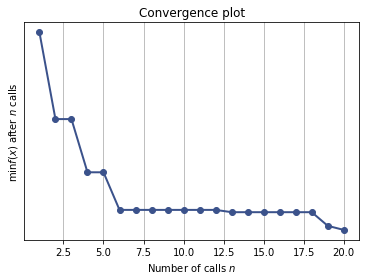

In [39]:
%matplotlib inline
from skopt.plots import plot_convergence
plot_convergence(r, yscale="log")

# Use best hps to train single model

In [6]:
#following must be defined
algo = 'nn' #am I using XGBoost (xgb) or Neural Nets (nn)?
total_frac = 1 #total fraction of data set to work with
training_pct = .7 #how much percent of total fraction should be used for training
random_split = True #make True if the training data should be chosen randomly
n_remote = 10000 #the n_remote most remote points will be added to training set if random_split = False
USE_PCA = True #should I use PCA?
N_COMPONENTS=400 #how many PCA Components should I use?
del_defective_mofs = False #make True if you want to remove all MOFs which a '0' value for at least one geometric property
cat_si_sd = False #make True if you want to concatenate size-indep and size-dep fps
add_size_fp = False #make True if you want to add 20 feature columns, where each feature is the number of atoms in a linker
size_dependent = False #make True if the input ML-ready data contains fingerprint which does not normalize each PG feature$
stacked = True #make True if the input ML-ready data contains pressure as feature
n_core = 18 #number of cores to use
if not stacked:
    SD_ML_DATA_PATH = '/data/rgur/efrc/prep_data/all_no_norm/ml_data.csv' #path to size-dep data
else:
    SD_ML_DATA_PATH = '/data/rgur/efrc/prep_data/all_no_norm/stacked.csv'
if not stacked:
    SI_ML_DATA_PATH = '/data/rgur/efrc/prep_data/all_v1/ml_data.csv' #path to size-indep data
else:
    SI_ML_DATA_PATH = '/data/rgur/efrc/prep_data/all_v1/stacked.csv'
if not stacked:
    start_str_sd = 'CH4_v/v_248_bar'
    end_str_sd = 'norm_Dom._Pore_(ang.)'
else:
    start_str_sd = 'Density'
    end_str_sd = 'norm_Dom._Pore_(ang.)'

start_str_si = 'filename'
end_str_si = 'valence_pa'
del_geometric_fp = False #make True if you want to ignore the geometric features
cat_col_names = ['oh_1', 'oh_2', 'oh_3', 'oh_4'] #names for interpenetration columns
Y_DATA_PATH = '/data/rgur/efrc/data_DONOTTOUCH/hMOF_allData_March25_2013.xlsx' #path to original hMOF data
default_params = {'objective':'reg:linear', 'colsample_bytree':0.3, 'learning_rate':0.1,
                'max_depth':15, 'alpha':10, 'n_estimators':10}
n_trees = 50 #number of weak learners. Bigger is better until 5000
save_pp = False #make True if you want to save the parity plot
#########################################################################

In [7]:
if not stacked:
    ml_data, property_used, target_mean, target_std, features = ml.prepToSplit(cat_si_sd, SD_ML_DATA_PATH, 
                                            SI_ML_DATA_PATH, start_str_sd, end_str_sd, start_str_si, end_str_si, 
                                            total_frac, del_defective_mofs, add_size_fp, size_dependent, stacked, n_core, 
                                            del_geometric_fp, cat_col_names, Y_DATA_PATH)
if stacked:
    ml_data, property_used, target_mean, target_std, features, p_info = ml.prepToSplit(cat_si_sd, SD_ML_DATA_PATH, 
                                            SI_ML_DATA_PATH, start_str_sd, end_str_sd, start_str_si, end_str_si, 
                                            total_frac, del_defective_mofs, add_size_fp, size_dependent, stacked, n_core, 
                                            del_geometric_fp, cat_col_names, Y_DATA_PATH)

ml_data.head()

train_df, test_df= ml.trainTestSplit(ml_data, property_used, training_pct, stacked, 
                                     n_core, random_split, n_remote, features, USE_PCA, N_COMPONENTS)

if algo == 'xgb':
    train_d, test_d, train_label, test_label = ml.alter_dtype(train_df, test_df, property_used, n_core, algo, features)
else:
    train_d, test_d, train_label, test_label = ml.alter_dtype(train_df, test_df, property_used, n_core, algo, features)

len(train_label) + len(test_label)

# Run Single Model

#Good parameters

SAVE_FIG = False

/home/modules/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)




Using following 420 features
Mafp_Br1_C2_C1
Mafp_Br1_C2_C2
Mafp_Br1_C2_C3
Mafp_Br1_C3_Br1
Mafp_Br1_C3_C1
Mafp_Br1_C3_C2
Mafp_Br1_C3_C3
Mafp_Br1_C3_C4
Mafp_Br1_C3_N1
Mafp_Br1_C3_N2
Mafp_Br1_C3_N3
Mafp_Br1_C3_O1
Mafp_Br1_C4_Br1
Mafp_Br1_C4_C2
Mafp_Br1_C4_C3
Mafp_Br1_C4_C4
Mafp_Br1_C4_H1
Mafp_Br1_C4_N1
Mafp_Br1_C4_N2
Mafp_Br1_C4_N3
Mafp_Br1_C4_O1
Mafp_Br1_C4_O2
Mafp_Br1_N2_C2
Mafp_Br1_N2_C3
Mafp_Br1_N2_C4
Mafp_Br1_N2_N1
Mafp_Br1_N2_N2
Mafp_Br1_N2_N3
Mafp_Br1_N3_Br1
Mafp_Br1_N3_C2
Mafp_Br1_N3_C3
Mafp_Br1_N3_H1
Mafp_Br1_N3_N2
Mafp_Br1_N3_O2
Mafp_Br1_O2_C2
Mafp_Br1_O2_C3
Mafp_Br1_O2_C4
Mafp_C1_C2_C2
Mafp_C1_C2_C3
Mafp_C1_C2_C4
Mafp_C1_C2_F1
Mafp_C1_C2_H1
Mafp_C1_C2_O1
Mafp_C1_C2_O2
Mafp_C1_C3_C2
Mafp_C1_C3_C3
Mafp_C1_C3_C4
Mafp_C1_C3_Cl1
Mafp_C1_C3_F1
Mafp_C1_C3_H1
Mafp_C1_C3_N2
Mafp_C1_C3_N3
Mafp_C1_C3_O1
Mafp_C1_C3_O2
Mafp_C1_C4_C2
Mafp_C1_C4_C3
Mafp_C1_C4_C4
Mafp_C1_C4_H1
Mafp_C1_C4_O1
Mafp_C1_C4_O2
Mafp_C1_N2_C2
Mafp_C1_N2_C3
Mafp_C1_N2_N2
Mafp_C1_N2_N3
Mafp_C1_N3_C3
Mafp_C1_N3_C4
Mafp

In [57]:
#params = r.x
params = [204, 0.001, 15, 4, 0.01]
SCALE_BATCH = False
BATCH_IND = 3

In [58]:
if SCALE_BATCH:
    params[BATCH_IND] = int(params[BATCH_IND] * (total_frac/ total_frac_hp))

SAVE_FIG = False

MODEL = ml.run_model(algo, train_d, n_trees, params)
ml.parity_plot(MODEL, train_d, test_d, stacked, algo, target_mean, target_std, property_used, test_label, train_label, save=SAVE_FIG)

Train on 369807 samples, validate on 3736 samples
Epoch 1/1000
369752/369807 [============================>.] - ETA: 0s - loss: 0.0177 - mae: 0.0931 - mse: 0.0177
Epoch 00001: val_loss improved from inf to 0.01161, saving model to model_checkpoint.h5

Epoch: 0, loss:0.0176,  mae:0.0931,  mse:0.0176,  val_loss:0.0116,  val_mae:0.0753,  val_mse:0.0116,  
369807/369807 [==============================] - 231s 626us/sample - loss: 0.0176 - mae: 0.0931 - mse: 0.0176 - val_loss: 0.0116 - val_mae: 0.0753 - val_mse: 0.0116
Epoch 2/1000
369776/369807 [============================>.] - ETA: 0s - loss: 0.0130 - mae: 0.0783 - mse: 0.0130
Epoch 00002: val_loss did not improve from 0.01161
369807/369807 [==============================] - 235s 636us/sample - loss: 0.0130 - mae: 0.0783 - mse: 0.0130 - val_loss: 0.0130 - val_mae: 0.0800 - val_mse: 0.0130
Epoch 3/1000
369800/369807 [============================>.] - ETA: 0s - loss: 0.0120 - mae: 0.0748 - mse: 0.0120
Epoch 00003: val_loss did not improve 

Epoch 25/1000
369784/369807 [============================>.] - ETA: 0s - loss: 0.0090 - mae: 0.0647 - mse: 0.0090
Epoch 00025: val_loss did not improve from 0.00878
369807/369807 [==============================] - 236s 639us/sample - loss: 0.0090 - mae: 0.0647 - mse: 0.0090 - val_loss: 0.0098 - val_mae: 0.0718 - val_mse: 0.0098
Epoch 26/1000
369768/369807 [============================>.] - ETA: 0s - loss: 0.0090 - mae: 0.0647 - mse: 0.0090
Epoch 00026: val_loss did not improve from 0.00878
369807/369807 [==============================] - 228s 616us/sample - loss: 0.0090 - mae: 0.0647 - mse: 0.0090 - val_loss: 0.0091 - val_mae: 0.0666 - val_mse: 0.0091
Epoch 27/1000
369732/369807 [============================>.] - ETA: 0s - loss: 0.0090 - mae: 0.0645 - mse: 0.0090
Epoch 00027: val_loss did not improve from 0.00878
369807/369807 [==============================] - 229s 620us/sample - loss: 0.0090 - mae: 0.0645 - mse: 0.0090 - val_loss: 0.0094 - val_mae: 0.0700 - val_mse: 0.0094
Epoch 28/1

W0413 16:03:53.127338 139720804841216 callbacks.py:1286] Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae,mse
W0413 16:03:53.128365 139720804841216 callbacks.py:1018] Can save best model only with val_loss available, skipping.


.

KeyboardInterrupt: 

# Save model

In [42]:
now = datetime.datetime.now().strftime("%I:%M%p_on_%B_%d_%Y")
now

'02:05PM_on_April_13_2020'

In [43]:
print("h_units %s" %params[0])
print("lr %s" %params[1])
print("patience %s" %params[2])
print("batch size %s" %params[3])
print("validation split %s" %params[4])

h_units 212
lr 0.0016765613721795554
patience 14
batch size 23
validation split 0.06133593626865962


In [44]:
SAVE_FIG = True

Test RMSE is 8.47365149278117


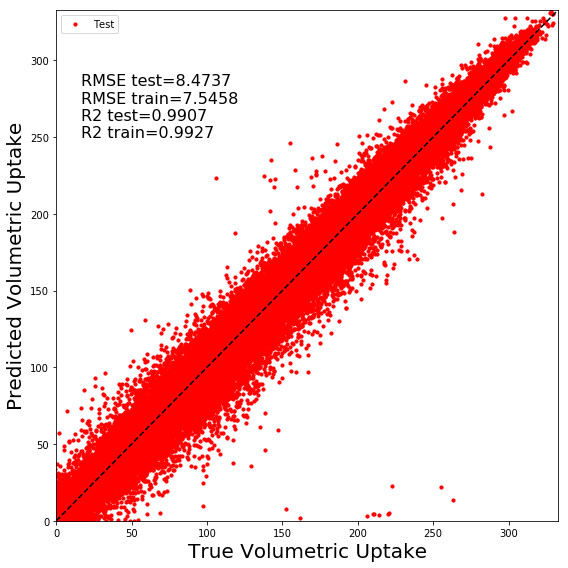

In [45]:
ml.parity_plot(MODEL, train_d, test_d, stacked, algo, target_mean, target_std, property_used, test_label, train_label, save=SAVE_FIG, fname=now)

In [46]:
#only run below to save

In [47]:
if algo=='xgb':
    MODEL.save_model('/data/rgur/efrc/ml/models/%s/%s.xgb' %(now, now))
else:
    MODEL.save('/data/rgur/efrc/ml/models/%s/%s.h5' %(now, now),save_format='h5')

In [48]:
train_df['filename'].to_csv('/data/rgur/efrc/ml/models/%s/train_%s.csv' %(now, now))

/home/modules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [49]:
test_df['filename'].to_csv('/data/rgur/efrc/ml/models/%s/test_%s.csv' %(now, now))

/home/modules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [50]:
import pickle

In [51]:
with open('/data/rgur/efrc/ml/models/%s/features_%s.pkl' %(now, now), 'wb') as f:
    pickle.dump(features, f, protocol=3)